In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Read data
data = pd.read_csv("data/card_transdata.csv")

In [4]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.groupby(by=["fraud"]).count()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,912597,912597,912597,912597,912597,912597,912597
1.0,87403,87403,87403,87403,87403,87403,87403


<AxesSubplot: >

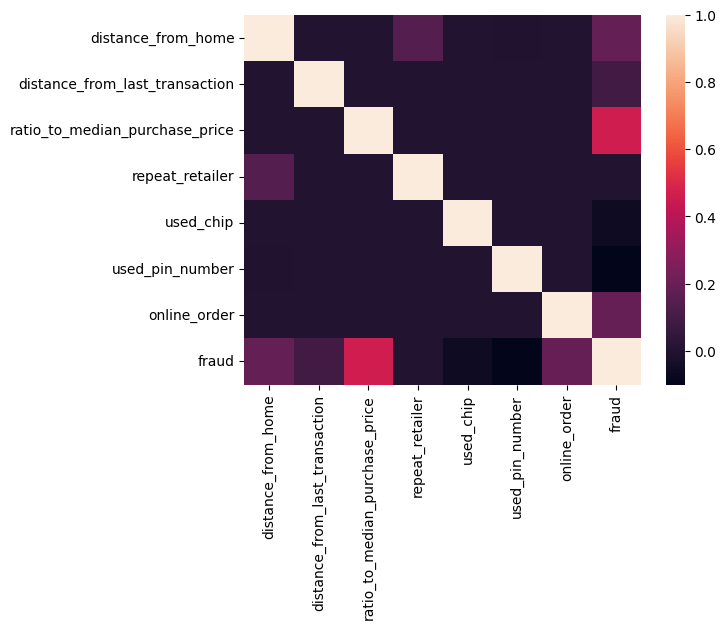

In [10]:
sns.heatmap(data.corr())

In [11]:
class_count_0, class_count_1 = data['fraud'].value_counts()

In [12]:
# Separate class
class_0 = data[data['fraud'] == 0]
class_1 = data[data['fraud'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (912597, 8)
class 1: (87403, 8)


In [13]:
class_0_under = class_0.sample(class_count_1)

new_df = pd.concat([class_0_under, class_1], axis=0)


In [20]:
new_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
801705,8.288330,7.545431,1.196020,1.0,1.0,0.0,1.0,0.0
13988,9.413882,0.897983,0.369751,1.0,0.0,0.0,1.0,0.0
481879,13.249576,14.388608,0.325933,1.0,1.0,0.0,1.0,0.0
490621,11.496368,1.434148,1.110273,1.0,0.0,0.0,1.0,0.0
315450,20.271107,22.326684,3.477127,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [14]:
y = new_df["fraud"]
X = new_df.drop(["fraud"], axis = 1)
# X = X[["online_order", "ratio_to_median_purchase_price", "distance_from_home", "distance_from_last_transaction"]]

In [3]:
y = data["fraud"]
X = data.drop(["fraud"], axis = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
pred = neigh.predict(X_test)

In [18]:
accuracy_score(pred, y_test)

0.9690324549025591

In [7]:
accuracy_score(pred, y_test) # For actual data

0.98291

In [10]:
accuracy_score(pred, y_test)

0.9843866666666666